# Visualization of holomorphic functions with Python

Source: 

  - Title:   Scientific Visualisation - Python & Matplotlib
  - Author:  Nicolas P. Rougier
  - URL:     https://github.com/rougier/scientific-visualization-book
  - License: BSD

TODO:
  - plots & contours
  - start 3D plots with real and imag, urk, not very useful.
  - vectorisation
  - tricks with integer (non-labelled) contours
  - exploration with real, imag. Use IFT & conformal transform to explain what we see (90° angles) ?
  - then modulus, log-modulus, angle, etc.

In [1]:
from numpy import *
from matplotlib.pyplot import *

## Paths & Winding Number

In [2]:
def path_concat(*paths):
    @vectorize
    def path(t):
        n = len(paths)
        i = int(n * t)
        s = n * t - i
        if s == 0.0 and i > 0:
            i, s = i - 1, 1.0
        return paths[i](s)
    return path

def path_plot(path, n=1000, *args, **kwargs):
    t = linspace(0.0, 1.0, n)
    path_t = path(t)
    plot(path_t.real, path_t.imag, *args, **kwargs)
        

In [3]:
def circle(c=0j, r=1.0, arg0=0.0, arg1=2*pi):
    def gamma(t):
        return r * exp(1j * (arg0 + (arg1-arg0) * t)) + c

    return gamma


def line(z0=0, z1=1):
    def gamma(t):
        return (1 - t) * z0 + t * z1

    return gamma


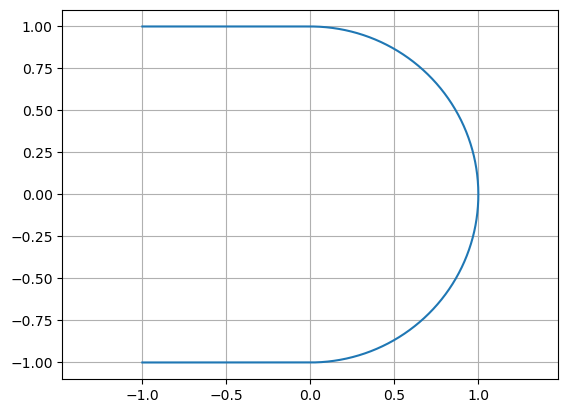

In [4]:
path = path_concat(
    line(-1-1j, -1j),
    circle(arg0=-pi/2, arg1=pi/2),
    line(1j, 1j-1)
)
path_plot(path)
axis("equal")
grid(True)

In [5]:
def integral(f, path, n=1000):
    t = linspace(0.0, 1.0, n, endpoint=False)
    dt = 1.0 / n
    path_t = path(t)
    dpath_t = path(t+dt) - path(t)
    return sum(f(path(t)) * dpath_t)



In [6]:
def f(z):
    return 1.0 / z

integral(f, circle()) / (2*pi*1j)

(0.9999934202767214+0.0031415823181778226j)

In [7]:
def arg_var(path, a=0.0, n=1000):
    def f(z):
        return 1.0 / (z - a)
    i = integral(f, path, n)
    return i.imag

def winding_number(path, a=0.0, n=1000):
    # Assumption: the path is closed
    w = arg_var(path, a, n)
    return int(round_(w / (2*pi)))

In [8]:
winding_number(circle())

1

In [9]:
winding_number(circle(arg1=6*pi))

3

In [10]:
winding_number(circle(c=0.5))

1

In [11]:
winding_number(circle(c=-1.5))

0

(-1.1, 1.1, -1.1, 1.1)

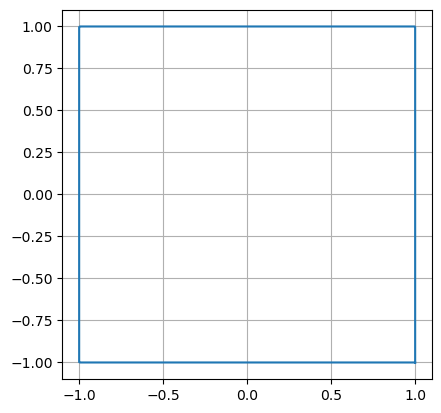

In [12]:
square = path_concat(
    line(1 - 1j, 1 + 1j),
    line(1 + 1j, -1 + 1j),
    line(-1 + 1j, -1 - 1j),
    line(-1 - 1j, 1 - 1j),
)

t = linspace(0.0, 1.0, 1000)
square_t = square(t)
plot(square_t.real, square_t.imag)
grid(True)
axis("square")


In [13]:
winding_number(square)

1

In [14]:
winding_number(path_concat(square, square))

2

In [15]:
winding_number(lambda t: square(1.0 - t))

-1

In [16]:
winding_number(square, a=0.95+0.95j)

1

In [17]:
winding_number(square, a=1.05+0.95j)

0

## Conformal Mappings

In [18]:
def grid(xs, ys):
    paths = []
    x_min, x_max = xs[0], xs[-1]
    y_min, y_max = ys[0], ys[-1]
    for x in xs:
        paths.append(line(x+1j*y_min, x+1j*y_max))
    for y in ys:
        paths.append(line(x_min+1j*y, x_max+1j*y))
    return paths

def polar_grid(rs, thetas, c=0.0+0.0j):
    paths = []
    r_min, r_max = rs[0], rs[-1]
    theta_min, theta_max = thetas[0], thetas[-1]
    
    for r in rs:
        paths.append(circle(r=r, arg0=theta_min, arg1=theta_max, c=c))
    for theta in thetas:
        paths.append(line(r_min*exp(1j*theta)+c, r_max*exp(1j*theta)+c))
    return paths

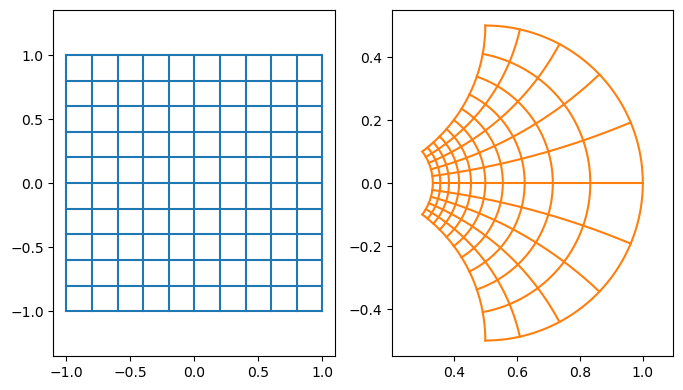

In [19]:

def f(z):
    return 1/(z+2)


paths = grid(xs=linspace(-1,1, 11), ys=linspace(-1, 1, 11))
t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

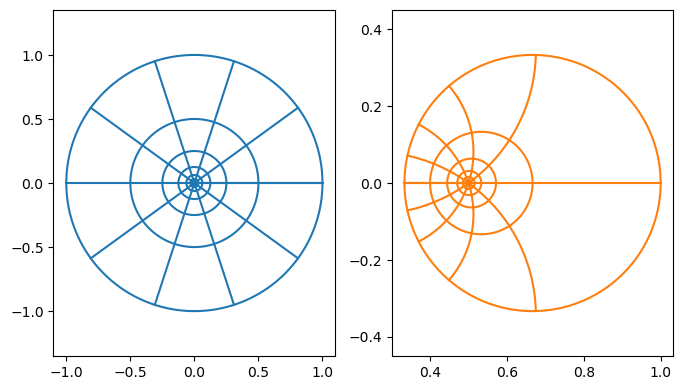

In [20]:
def f(z):
    return 1/(z+2)


paths = polar_grid(rs=logspace(-10, 0, 11, base=2), thetas=linspace(0, 2*pi, 11))

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

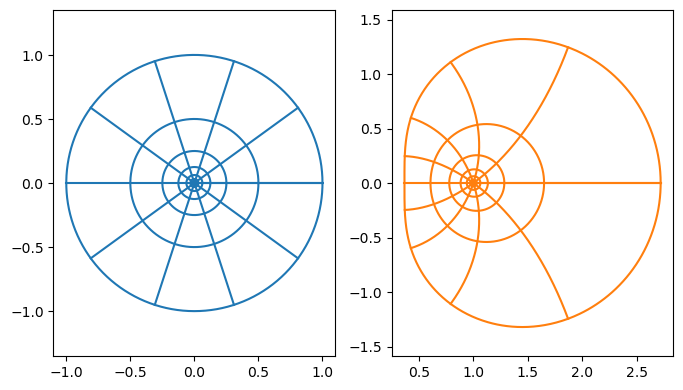

In [21]:
def f(z):
    return exp(z)


paths = polar_grid(rs=logspace(-10, 0, 11, base=2), thetas=linspace(0, 2*pi, 11))

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

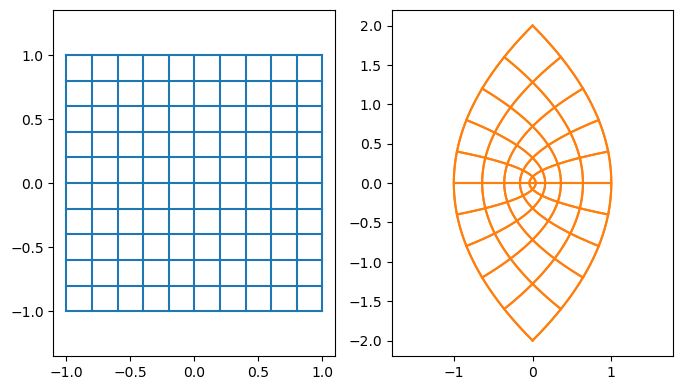

In [22]:
def f(z):
    return z*z
paths = grid(xs=linspace(-1,1, 11), ys=linspace(-1, 1, 11))
t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

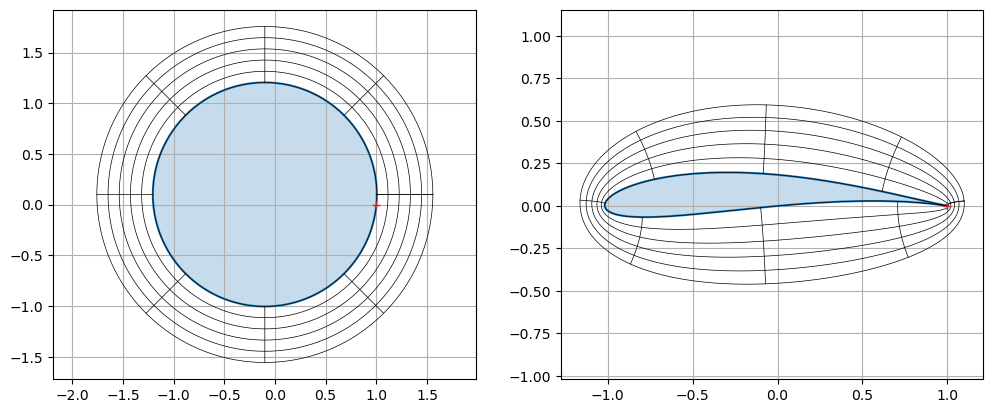

In [23]:
def Joukowsky(z):
    return 0.5*(z + 1.0 / z)

c = -0.10 + 0.10j
r = abs(c - 1) # such that the circle circle(c, t) goes through 1+0j

J = Joukowsky

gamma = circle(c=c, r=r)
J_gamma = lambda t: Joukowsky(gamma(t))

paths = polar_grid(rs=[1.0*r, 1.1*r, 1.2*r, 1.3*r, 1.4*r, 1.5*r], thetas=linspace(0, 2*pi, 8+1), c=c)

fig, (ax1, ax2) = subplots(1,2)
fig.set_figwidth(12)

t = linspace(0.0, 1.0, 10000)

ax1.plot(gamma(t).real, gamma(t).imag, color="C0")
ax1.fill(gamma(t).real, gamma(t).imag, color="C0", alpha=0.25)
for path in paths:
    path_t = path(t)
    ax1.plot(path_t.real, path_t.imag, color="k", lw=0.5)
#ax1.plot(c.real, c.imag, "+", color="C2")
ax1.plot(+1.0, 0, "+", color="C3")
ax1.grid(True)
ax1.axis("equal")

ax2.plot(J_gamma(t).real, J_gamma(t).imag, color="C0")
ax2.fill(J_gamma(t).real, J_gamma(t).imag, color="C0", alpha=0.25)
for path in paths:
    J_path_t = J(path(t))
    ax2.plot(J_path_t.real, J_path_t.imag, color="k", lw=0.5)
#ax2.plot(J(c).real, J(c).imag, "+", color="C2")
ax2.plot(J(1.0).real, J(1.0).imag, "+", color="C3")


ax2.grid(True)
ax2.axis("equal")

None

# TODO: study/explain the "pinch" (f'=0 when z=1 => angle doubling)
# TODO: irrotational & incompressible flow. Solve for cylinder, then map?


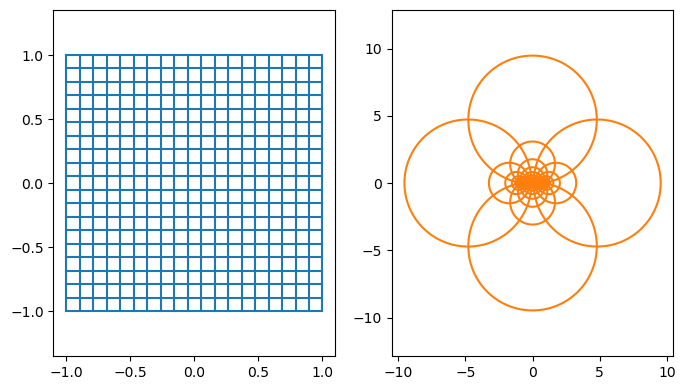

In [24]:
f = Joukowsky

paths = grid(xs=linspace(-1,1, 20), ys=linspace(-1, 1, 20))
t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

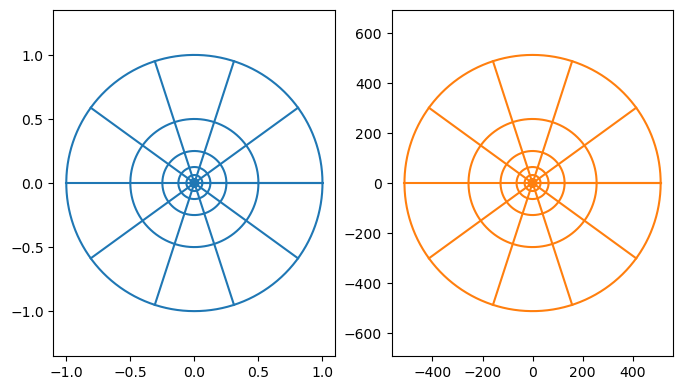

In [25]:
f = Joukowsky


paths = polar_grid(rs=logspace(-10, 0, 11, base=2), thetas=linspace(0, 2*pi, 11))

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

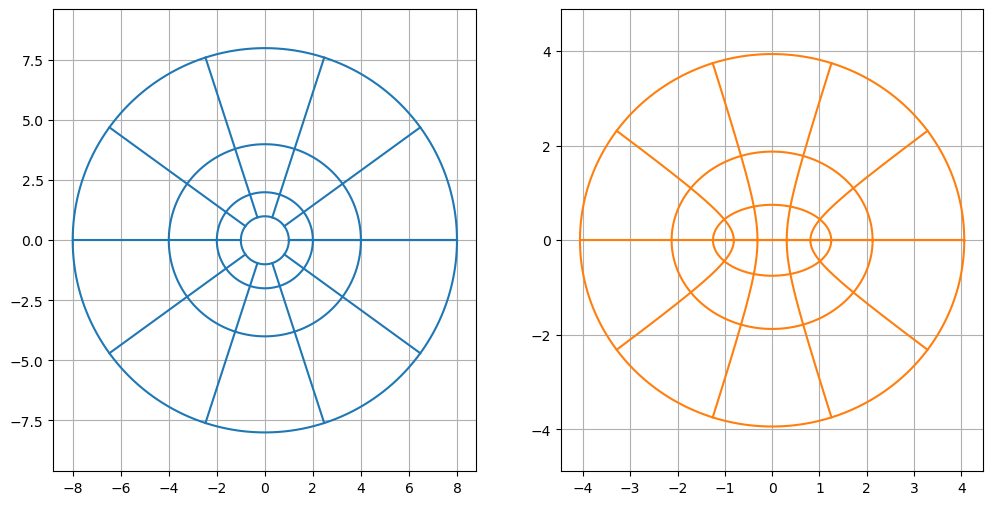

In [26]:
# Joukowsky, annular custom grid
rs = logspace(0, 3, 4, base=2)
thetas = linspace(0, 2*pi, 11)

paths = polar_grid(rs=rs, thetas=thetas)

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(12, 6))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax1.grid(True)
ax2.axis("equal")
ax2.grid(True)
None

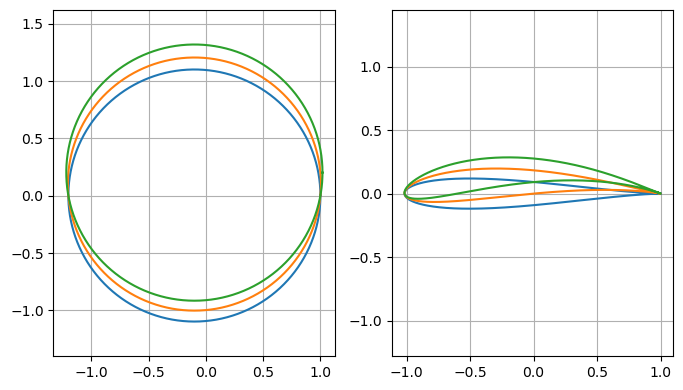

In [27]:
cs = [-0.1 + 1j*y for y in [0.0, 0.1, 0.2]]
rs = [abs(c - 1) for c in cs]

fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))

for i, (c, r) in enumerate(zip(cs, rs)):

    gamma = circle(c=c, r=r)
    J_gamma = lambda t: Joukowsky(gamma(t))

    t = linspace(0.0, 1.0, 1000)

    color = "C" + str(i)

    ax1.plot(gamma(t).real, gamma(t).imag, color=color)
    ax1.grid(True)
    ax1.axis("equal")

    ax2.plot(J_gamma(t).real, J_gamma(t).imag, color=color)
    ax2.grid(True)
    ax2.axis("equal")

None
# TODO: needs animation, or grid (3*4 grid ?) for the different designs.

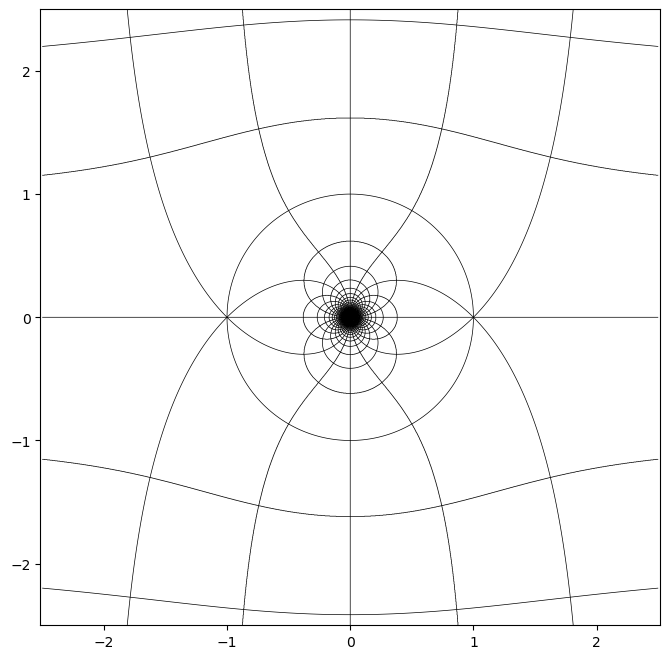

In [28]:

T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = f(Z)

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, W.real - round_(W.real), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, W.imag - round_(W.imag), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None

## ⚠️ Change

The circle is always the unit centered circle, the J transform is parametric and adjusts.

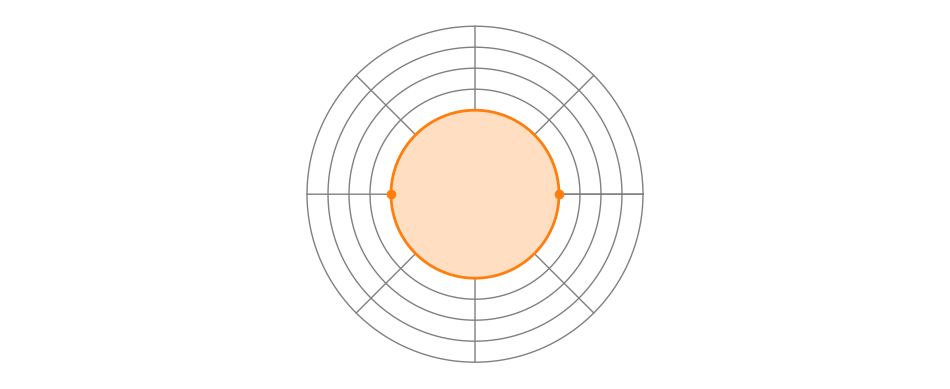

In [29]:
gamma = circle()
paths = polar_grid(rs=linspace(1.0, 2.0, 5), thetas=linspace(0, 2*pi, 8+1))


fig, axes = subplots()
fig.set_figwidth(12)
t = linspace(0.0, 1.0, 10000)

color = "C1"
for path in paths:
    path_t = path(t)
    axes.plot(path_t.real, path_t.imag, color="grey", lw=1)
    
axes.fill(gamma(t).real, gamma(t).imag, color=color, alpha=0.25)
axes.plot(gamma(t).real, gamma(t).imag, color=color, lw=2)
axes.plot(+1.0, 0, ".", color=color, ms=12)
axes.plot(-1.0, 0, ".", color=color, ms=12)

axes.set_xticks([]); ax1.set_yticks([])
axes.axis("equal")
axes.axis("off")

None

# TODO: study/explain the "pinch" (f'=0 when z=1 => angle doubling)
# TODO: irrotational & incompressible flow. Solve for cylinder, then map?

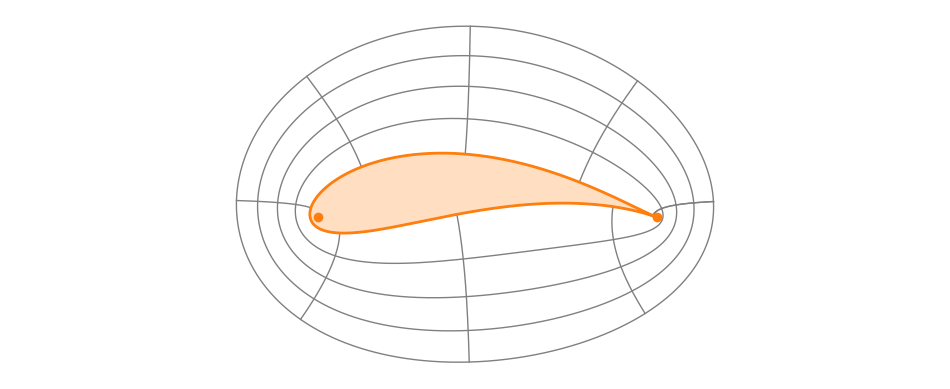

In [30]:
a = 1.2 # * exp(-pi/16*1j) # pick any a with |a| >= 1 and any arg (small and negative the better). See the influence.
theta = -pi / 16
b = 1 - a*exp(1j*theta) # This is forced by the constraint that J(1) = 1. (Note: yields J'(1)= 0, which is good wrt the pinch !)

def Joukowsky(z):
    w = a * z + b
    return 0.5 * (w + 1.0 / w)

J = Joukowsky

gamma = circle()
J_gamma = lambda t: J(gamma(t))

fig, ax = subplots()
fig.set_figwidth(12)
color = "C1"
for path in paths:
    J_path_t = J(path(t))
    ax.plot(J_path_t.real, J_path_t.imag, color="grey", lw=1)
ax.plot(J_gamma(t).real, J_gamma(t).imag, color=color, lw=2)
ax.fill(J_gamma(t).real, J_gamma(t).imag, color=color, alpha=0.25)
ax.plot(1.0, 0.0, ".", color=color, ms=12, label="1")
ax.plot(-1.0, 0.0, ".", color=color, ms=12, label="-1")
ax.set_xticks([]); ax2.set_yticks([])
ax.axis("equal")
ax.axis("off")

None

# Flows

### 🚧 Question

Show that the 2D continuously differentiable steady 🏷️ **flow** (or 🏷️ **velocity field**)*

$$
\vec{v} = \left[
\begin{array}{c}
v_x \\
v_y
\end{array}    
\right]
$$

is irrotational and incompressible if and only if the 🏷️ **complex velocity** $f$ defined by

$$
f(x+iy) := v_x(x, y) -i v_y(x,y)
$$ 

is holomorphic.

### 🔓 Solution

The flow is irrotational and incompressible if and only if

$$
\vec{\nabla} \wedge \vec{v}
= \partial_x v_y - \partial_y v_x = 0
= 0
\; \mbox{ and } \;
\vec{\nabla} \cdot \vec{v} = \partial_x v_x + \partial_y v_y = 0.
$$

On the other hand, the Cauchy-Riemann equations for $f$ are

$$
\partial_x v_x = \partial_y (-v_y)
\; \mbox{ and } \;
\partial_x (-v_y) = - \partial_y v_y.
$$

These sets of equations are identical. Therefore, the flow $\vec{v}$ is irrotational if and only its complex velocity $f$ is holomorphic.
◼️ 

## Boundary Condition

### 🚧 Question

We will assume that a velocity field $\vec{f}$ defined on (an open neighbourghood of) the closed unit $D$ disk should be tangent to the disk on every point of the boundary. How does this condition translate to the complex velocity ?

### 🔓 Solution

On the disk boundary, the velocity should be orthogonal to the disk outer normal

$$
\left[
\begin{array}{c}
v_x \\
v_y
\end{array}
\right]
\perp
\left[
\begin{array}{c}
\cos \theta \\
\sin \theta
\end{array}
\right].
$$

or equivalently, via the scalar product

$$
v_x \cos \theta + v_y \sin \theta = 0.
$$

We may rewrite this equation as

$$
\Re \left((v_x - i v_y) (\cos \theta + i \sin \theta) \right) = \Re \left(f(e^{i\theta}) e^{i\theta}\right) = 0.
$$



### 🚧 Question

Show that for any real constants $U$ and $C$, the complex velocity

$$
f(z) = U - \frac{U}{z^2} + \frac{C}{i 2\pi} \frac{1}{z}, \; z \in \mathbb{C}^*
$$

satisfies the boundary condition. What does represent the parameter $U$ physically?

### 🔓 Solution

When $z=e^{i\theta}$, we get

$$
f(e^{i\theta}) = U + U e^{-i2\theta} + \frac{C}{i2\pi} e^{-i\theta}
= \left(2 U \sin \theta + \frac{C}{2\pi} \right) \frac{e^{-i\theta}}{i}.
$$

Therefore 

$$
\Re \left(f(e^{i\theta}) e^{i\theta}\right)
=
\Re \left(\left(2 U \sin \theta + \frac{C}{2\pi} \right) \frac{1}{i}\right)
= 0.
$$

When $|z|$ is large, $f(z) \approx U$, thus $v_x \approx U$ and $v_y \approx 0$. Thus, $U$ represent the velocity (which is horizontal) far from the disk.

## Circulation

### 🚧 Question

Physicists define the 🏷️ **circulation** of the flow around the closed path $\gamma = (\gamma_x, \gamma_y)$ as
the real number.

$$
\int_\gamma \vec{v} \cdot d \vec{\ell} = \int_0^1 \left( v_x(\gamma(s)) \gamma'_x(s) + v_y(\gamma(s)) \gamma'_y(s) \right) \, ds
$$

Can you compute the circulation using a line integral and the complex velocity associated to the flow?
Show that as long as $\gamma$ makes 1 turn around the unit disk, the value of the circulation is the same.
Compute it when $f(z) = U - \frac{U}{z^2} + \frac{C}{i 2\pi}$ and interpret the parameter $C$.

### 🔓 Solution

We have

$$
\int_0^1 \left( v_x(\gamma(s)) \gamma'_x(s) - (-v_y(\gamma(s))) \gamma'_y(s) \right) \, ds
= 
\int_0^1 \Re \left( f(\gamma(s)) \gamma'(s)\right) ds
= \Re \int_0^1 f(\gamma(s)) \gamma'(s) ds
= \Re \int_{\gamma} f(z) \, dz.
$$

If two paths $\gamma$ and $\mu$ turn around -- say $0$ -- the same number of times, since $f$ is holomorphic, the associated line integral is identical and so is the circulation. When $f(z) = U - \frac{U}{z^2} + \frac{C}{i 2\pi}\frac{1}{z}$, with $\gamma = [\circlearrowleft]$, we end up with

$$
\int_{[\circlearrowleft]} f(z) \, dz
=
\int_{[\circlearrowleft]} U - \frac{U}{z^2} + \frac{C}{i 2\pi}\frac{1}{z} \, dz
=
U\left(\int_{[\circlearrowleft]} 1 - \frac{1}{z^2} \, dz \right)
+
C \left(\frac{1}{i2\pi}\int_{[\circlearrowleft]} \frac{dz}{z}\right).
$$

Since $1 - 1/z$ has a primitive, the first integral is zero and it follows that

$$
\int_{[\circlearrowleft]} f(z) \, dz
= C \times \mbox{Res}\left(z \mapsto \frac{1}{z}, 0\right) = C.
$$

In other words, $C$ is the circulation of the flow around the disk.


 

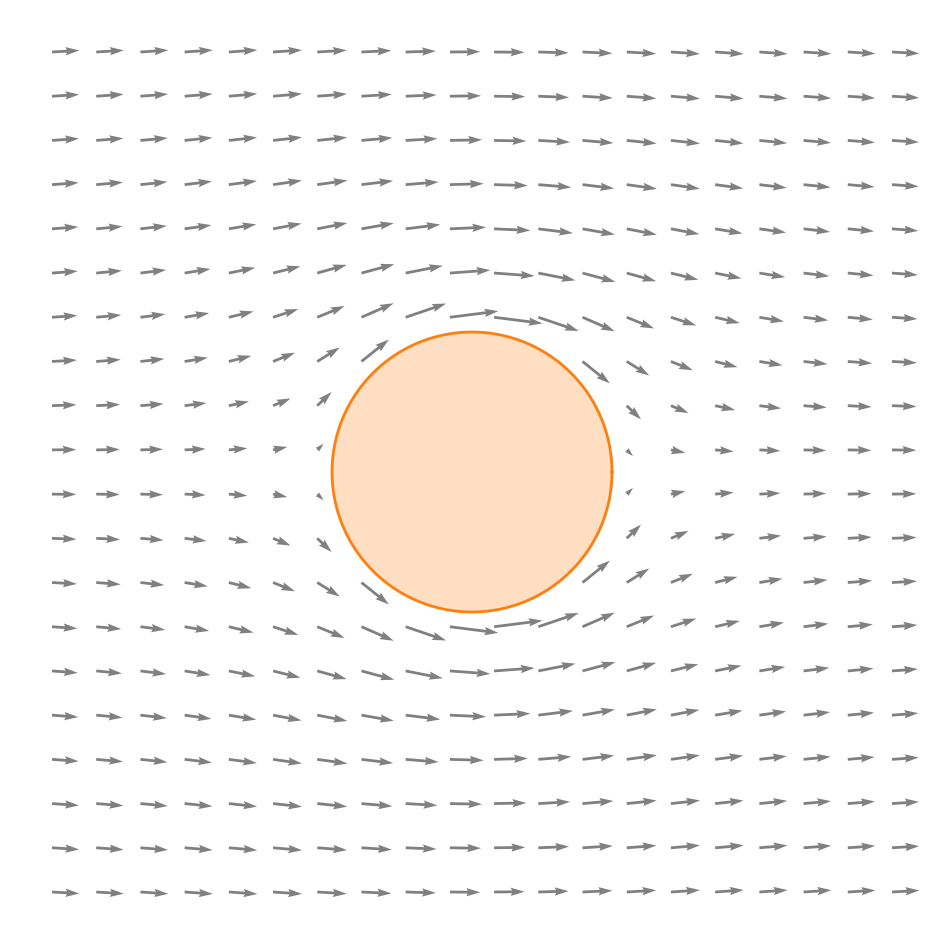

In [31]:
U = 1
C = 0

def f(z):
    return U - U / (z*z) + C / (2j*pi) / z

def v(function):
    def v_(X, Y):
        function_xy = function(X+1j*Y)
        return (function_xy.real, -function_xy.imag)
    return v_

figure(figsize=(12,12))
xs = ys = linspace(-3.0, 3.0, 20)
X, Y = meshgrid(xs, ys)
Vx, Vy = v(f)(X, Y) * (X*X+Y*Y >= 1.0)

quiver(X, Y, Vx, Vy, color="grey")

color = "C1"
theta = linspace(0, 2*pi, 1000)
fill(cos(theta), sin(theta), color="white")
fill(cos(theta), sin(theta), color="C1", alpha=0.25)
plot(cos(theta), sin(theta), color="C1", lw=2)

axis("square")
axis("off")

None


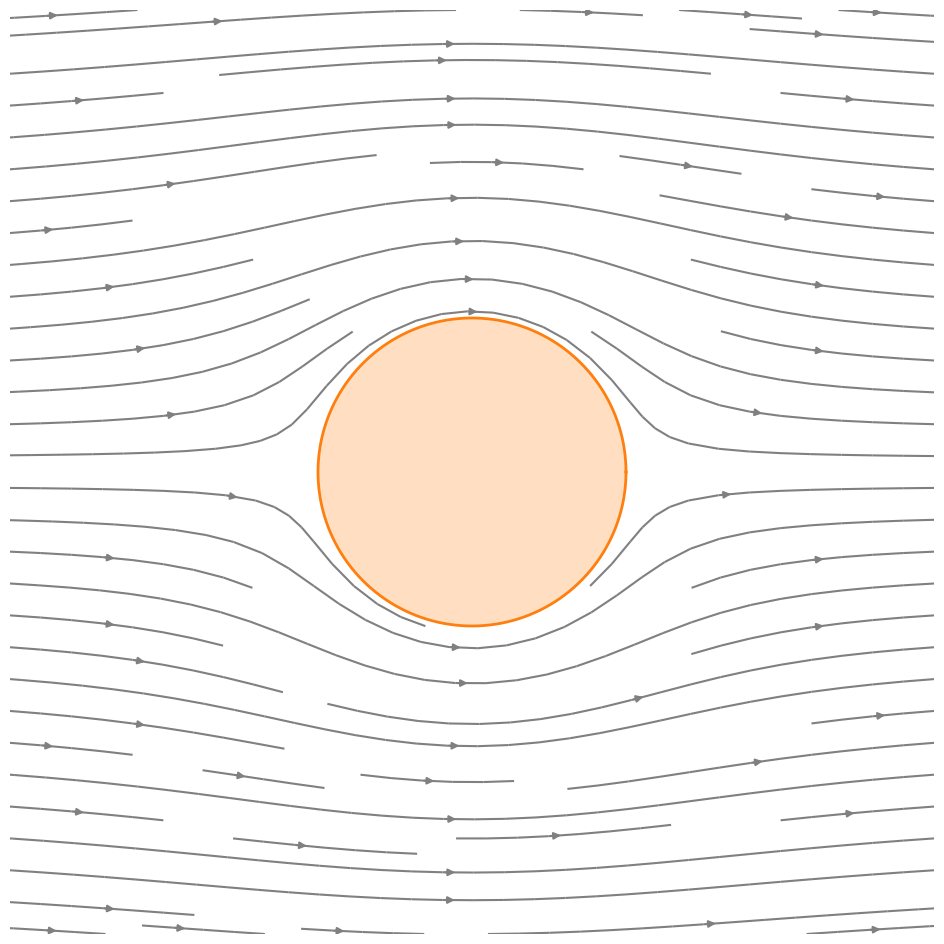

In [32]:
figure(figsize=(12,12))
xs = ys = linspace(-3.0, 3.0, 100)
X, Y = meshgrid(xs, ys)
Vx, Vy = v(f)(X, Y) * (X*X+Y*Y >= 1.0)

streamplot(X, Y, Vx, Vy, color="grey")

theta = linspace(0, 2*pi, 1000)
color = "C1"
fill(cos(theta), sin(theta), color="white")
fill(cos(theta), sin(theta), color="C1", alpha=0.25)
plot(cos(theta), sin(theta), color="C1", lw=2)

axis("square")
axis("off")

None

### Joukowsky Transformation and its inverse

$$
w = J(z) = \frac{1}{2}\left(z + \frac{1}{z}\right)
$$

$$
z^2 - 2w z + 1 = 0
$$

$$
\Delta = 4w^2 - 4 = 4(w^2 - 1)
$$

$$
z = \frac{2w \pm \sqrt{\Delta}}{2} = w \pm \sqrt{w^2-1}
$$

If we take into account the pretransformation $z \mapsto a z + b$, the inverse is

$$
z = \frac{w \pm \sqrt{w^2-1} - b}{a}
$$

In [33]:
@vectorize
def J_inv(w):
    s = sqrt(w * w - 1)
    z1 = (w + s - b) / a
    z2 = (w - s - b) / a
    if abs(z1) >= 1.0:
        return z1
    else:
        return z2

In [34]:
def dJ(z):
    v = a * z + b
    return 0.5 * (1 - 1 / (v * v)) * a

In [35]:
@vectorize
def g(w):
    z = J_inv(w)
    return f(z) / dJ(z) 

Nota: if the complex velocity $f= u -i v$ is the derivative of a holomorphic function $g$, any conformal mapping $T$ applied to $g$ will preserve the boundary conditions. This is how we "solve" (find a solution) for the Joukowsky airfoil: get (a) $f$ (easy), find its primitive (means the circulation has to be zero !!!), map it, then derive the result a get the corresponding complex velocity.
This is **NOT** the same as mapping $f$ directly: if $g'=f$, then

$$
(g \circ T^{-1})' = (g'\circ T^{-1}) (T^{-1})' = (f \circ T^{-1}) \frac{1}{T' \circ T^{-1}}
= \frac{f}{T'} \circ T^{-1}
$$

Here, $f(z) = z -1/z^2$ and $T(z) = (c+ rz) + 1/(c+rz)$, thus
$$
T'(z) = r - \frac{r}{(c+rz)^2}.
$$

Hence 
$$
\frac{f}{T'}(z) = \frac{z-\frac{1}{z^2}}{r - \frac{r}{(c+rz)^2}}
$$


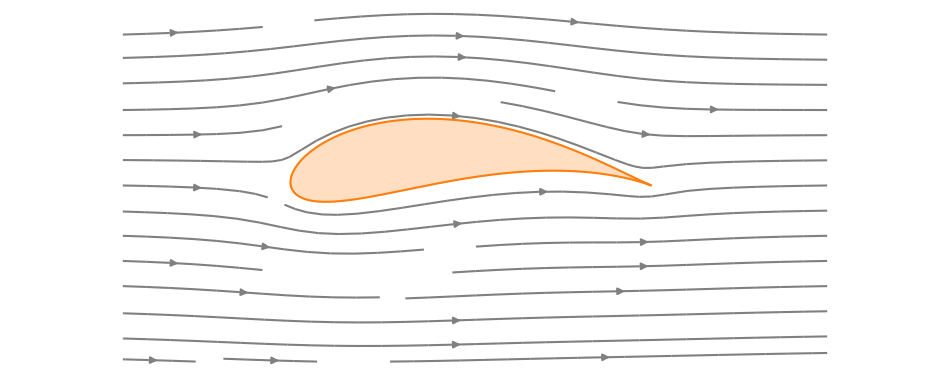

In [36]:
gamma = circle()
J_gamma = lambda t: J(gamma(t))

t = linspace(0.0, 1.0, 1000)

fig = figure()
fig.set_figwidth(12)
color = "C1"
fill(J_gamma(t).real, J_gamma(t).imag, color="white", zorder=10)
fill(J_gamma(t).real, J_gamma(t).imag, color=color, alpha=0.25, zorder=20)
plot(J_gamma(t).real, J_gamma(t).imag, color=color, zorder=30)


def v(function):
    def v_(X, Y):
        function_xy = function(X+1j*Y)
        return (function_xy.real, -function_xy.imag)
    return v_

xs = linspace(-2.0, 2.0, 100)
ys = linspace(-1.0, 1.0, 100)

X, Y = meshgrid(xs, ys)
mask = abs(J_inv(X+1j*Y)) >= 1.0
Vx, Vy = v(g)(X, Y) * mask


streamplot(X, Y, Vx, Vy, density=(1, 0.5), color="grey", zorder=-10)


axis("tight")
axis("equal")
axis("off")

None

## Domain Coloring

In [37]:
# TODO: collection of functions and small gallery

def Joukowsky(z):
    return 0.5*(z + 1.0 / z)

def f(Z):
    return Z # try several multiplicities, products, ratios, etc.

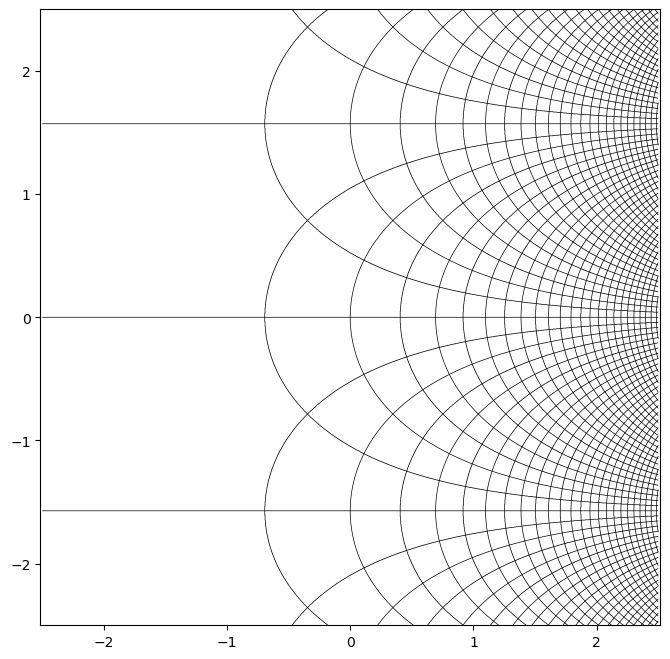

In [38]:
# Honestly, not sure that plotting Re and Im is useful in any way.
# But the rendering is also a bit weird TBH, I should check what's going on.
T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

# TODO: introduce contour principles beforehand (quadratic function?)
# TODO: display initial grid (aka f(z)=z) and then the mapping.

f = exp
W = f(Z)

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, W.real - round_(W.real), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, W.imag - round_(W.imag), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None


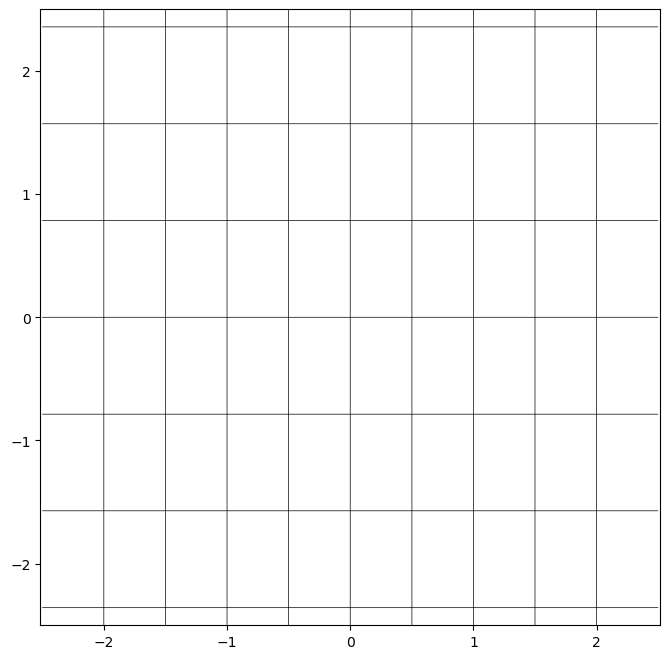

In [39]:
T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

f = exp
W = f(Z)
L = log(abs(W)) # symmetric for poles & zeros
N = 2
A = (angle(W)/pi) * N #  multiples of pi/N mapped to integers

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, L - round_(L), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, A - round_(A), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None

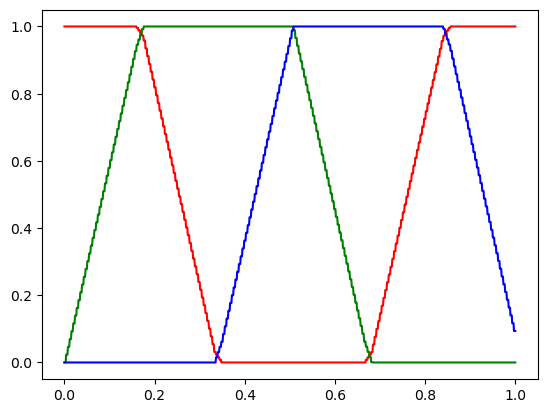

In [40]:
import matplotlib.cm as mcm

colormap = mcm.get_cmap("hsv")
u = linspace(0.0, 1.0, 1024)
RGBA = colormap(u)  # float64, but discretised (8-bit)
RGB = RGBA[:, :3]
plot(u, RGB[:, 0], color="red")
plot(u, RGB[:, 1], color="green")
plot(u, RGB[:, 2], color="blue")

None

# NOTA: we can deliver a RBGA array to imshow, that works! 👍


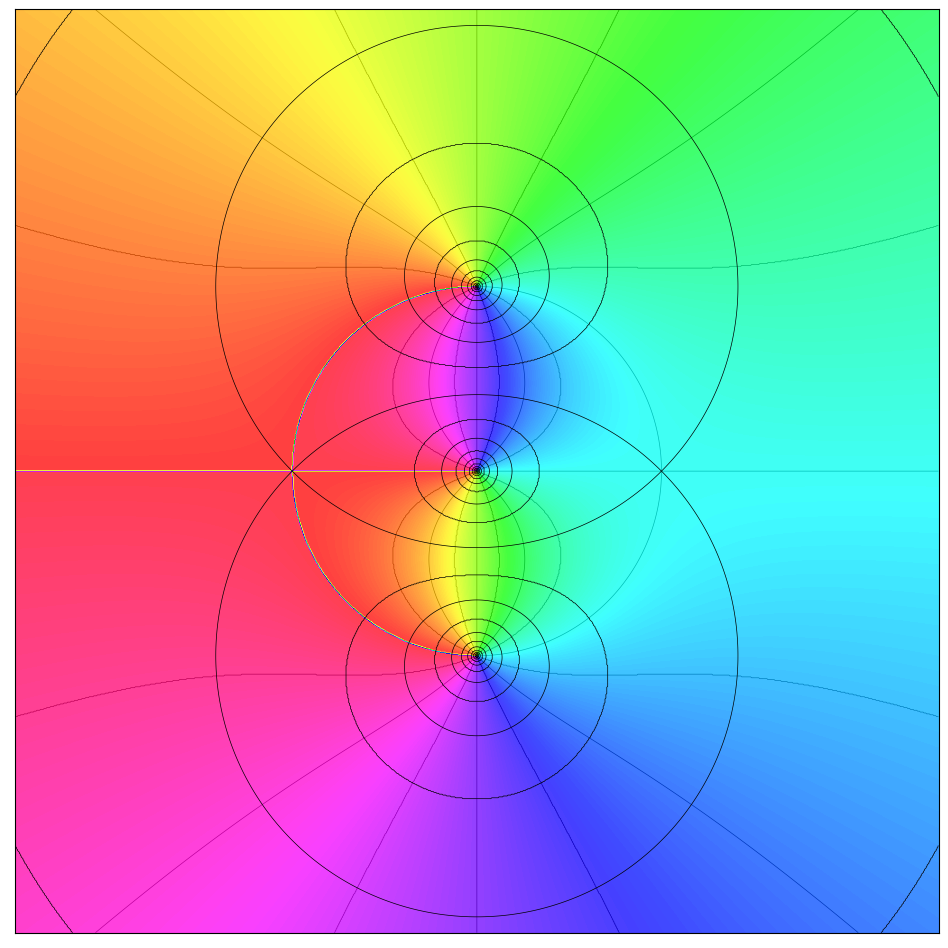

In [41]:
# TODO: 

T = linspace(-2.5, 2.5, 1024)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = Joukowsky(Z)

A = angle(W)
N = 4
An = (A / pi) * N
L = log(abs(W))


figure(figsize=(12.0, 12.0))
xlim(-2.5, 2.5, -2.5, 2.5)
# ax = fig.add_axes([e, e, 1 - 2 * e, 1 - 2 * e], frameon=True, facecolor="black")
ax = gca()
ax.set_facecolor("white")

# TODO:
#   - deal with discontinuity
#   - tweak luminance of the image?
# => work with the A -> RBG conversion ourselves.

im = ax.imshow(
    A,
    interpolation="bicubic",
    cmap="hsv", #"twilight", #"Spectral",
    rasterized=True,
    alpha=0.75,
)
ax.contour(An - round_(An), 1, colors="black", linewidths=0.5, zorder=-100)
ax.contour(L - round_(L), 1, colors="black", linewidths=0.5)

#colorbar(im)
ax.set_xticks([])
ax.set_yticks([])
None